<a href="https://colab.research.google.com/github/karuna3laka/Sentimental-Analyzing-for-Texts/blob/main/Sentimental_Analiziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing Sentimental analizis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Changed 'stlye' to 'style'
plt.style.use('ggplot')

import nltk


In [7]:
import pandas as pd

df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip', quoting=3)


In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [9]:
print(df.shape)
df.head()

(4941, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


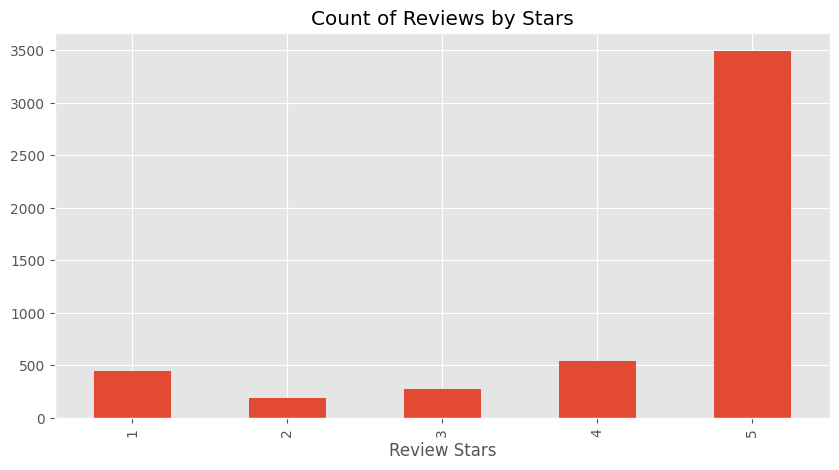

In [10]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [11]:
sample=df['Text'][34]
print(sample)

What a nice alternative to an apple pie. Love the fact there was no slicing and dicing. Easy to prepare. I also loved the fact that you can make them fresh whenever needed.


In [12]:
sample2=df['Text'][374]
print(sample2)

The price is pretty good given that local stores sell one bottle for almost $4. Don't know why the price on this has gone up though.


negative sentiments


In [13]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Now, try tokenizing the text and assign the result to 'tokens'
tokens = nltk.word_tokenize(sample2)

tokens[:10] # Now 'tokens' is defined and can be sliced


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['The',
 'price',
 'is',
 'pretty',
 'good',
 'given',
 'that',
 'local',
 'stores',
 'sell']

In [16]:
import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

# Now, try using pos_tag again
tagged=nltk.pos_tag(tokens)

tagged[:10] #printing first 10

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('The', 'DT'),
 ('price', 'NN'),
 ('is', 'VBZ'),
 ('pretty', 'JJ'),
 ('good', 'JJ'),
 ('given', 'VBN'),
 ('that', 'IN'),
 ('local', 'JJ'),
 ('stores', 'NNS'),
 ('sell', 'VBP')]

In [18]:
import nltk

# Download the required NLTK data package
nltk.download('words')

# Now, try using ne_chunk again
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  The/DT
  price/NN
  is/VBZ
  pretty/JJ
  good/JJ
  given/VBN
  that/IN
  local/JJ
  stores/NNS
  sell/VBP
  one/CD
  bottle/NN
  for/IN
  almost/RB
  $/$
  4/CD
  ./.
  Do/VBP
  n't/RB
  know/VB
  why/WRB
  the/DT
  price/NN
  on/IN
  this/DT
  has/VBZ
  gone/VBN
  up/RP
  though/IN
  ./.)


***APPLYING VADOR MODEL***




In [20]:
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
sia.polarity_scores('i like donut')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [22]:
sia.polarity_scores('i dont like donut')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [23]:
sia.polarity_scores('Happy new Year!')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}

# **sample is a thing inside the data set**


> sample
sample 2




In [24]:
sia.polarity_scores(sample)

{'neg': 0.051, 'neu': 0.577, 'pos': 0.372, 'compound': 0.9313}

In [25]:
df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...
4936,18259,B005WG1VRI,A7OT82DN460H2,Cattastrophe,0,0,5,1345680000,Awesome for Mochi,I bought this in the hopes of extending my cul...
4937,18260,B003IF92AS,A9FCZFB4QC0R1,J. Lor,0,0,5,1285545600,Good with Yogurt,A nice accompainment to an Indian dinner is th...
4938,18269,B000SATIGO,A1OOEYB6289C5C,Jaytrade,4,4,5,1330560000,Great Assam at a great bulk price,After having only 2 previous Assam teas I can ...
4939,18271,B000SATIGO,A3CPX9XWN4ZAFK,wefishallday,3,3,5,1327363200,DELICIOUS,Just received and made last night. Very good ...


# **RUN THE POLARITY TO WHOLE DATASET**

Comments are form Gemini and explaining

In [26]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    # Check if 'text' is a string before processing it
    if isinstance(text, str):
        res[myid] = sia.polarity_scores(text)
    else:
        # Handle missing or non-string values (e.g., skip or assign a default sentiment)
        # Here, we're skipping non-string values:
        print(f"Skipping row {myid} due to invalid text type: {type(text)}")
        # You could also assign default sentiment scores:
        # res[myid] = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


  0%|          | 0/4941 [00:00<?, ?it/s]

In [27]:
vaders=pd.DataFrame(res).T

# T --> swapping the rows and columns


# Merge Processed Data With Existing Dataset

In [28]:
vaders=pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [32]:
vaders.head()
#now we have sentimental score and metadata


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


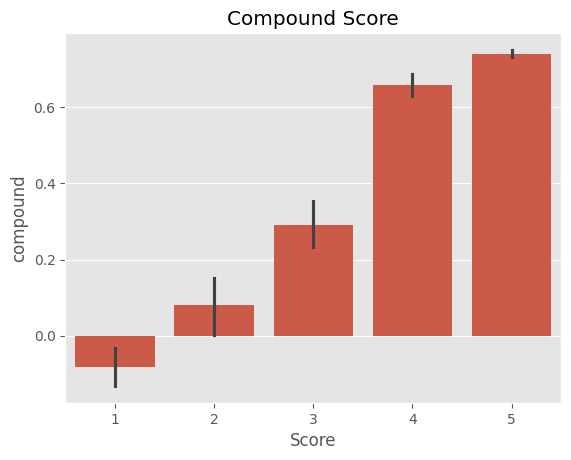

In [33]:
ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title("Compound Score")
plt.show()

# wht i was done before is see how the stars they gave and the vibe of the comment wuld **change**


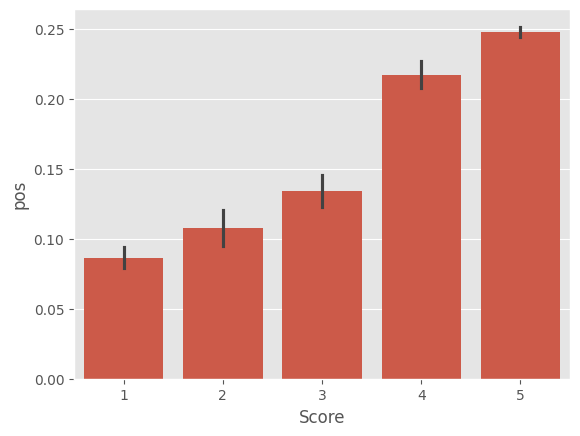

In [34]:
sns.barplot(data=vaders, x='Score', y='pos')
plt.show()

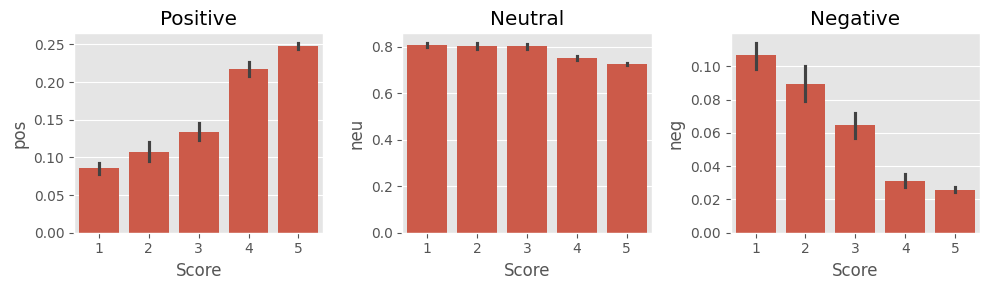

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

plt.show()

#1, 3 specifies one row and three columns of subplots.
#figsize=(12,3) sets the figure size to 12 inches wide and 3 inches tall.
